In [1]:
from bat import BatAlgorithm
from bees import BeesAlgorithm
from firefly import FireflyAlgorithm, SortedFireflyAlgorithm # two variants with time complexities of O(Tn^2) and O(Tnlogn)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def create_particle_placement_loss(k):
    def particle_placement_loss(x):
        positions = np.split(x, k)
        min_dist = np.infty
        for i in range(k):
            for j in range(i+1,k):
                min_dist = np.minimum(min_dist, np.sqrt(np.sum(np.square(positions[i]-positions[j]))))
        return min_dist
    return particle_placement_loss

In [79]:
objective = 'max'
n = 100
k = 20
d = 2 * k
range_min  = -5.0
range_max = 5.0
T = 200

In [80]:
bees = BeesAlgorithm(d=d, n=n, range_min=range_min, range_max=range_max,
                     nb=50, ne=20, nrb=5, nre=10, shrink_factor=0.8, stgn_lim=5)

bat = BatAlgorithm(d=d, n=n, range_min=range_min, range_max=range_max,
                   a=0.5, r=0.5, q_min=0.0, q_max=3.0)

firefly = SortedFireflyAlgorithm(d=d, n=n, range_min=range_min, range_max=range_max,
                           alpha=1.0, beta0=1.0, gamma=0.5)

In [81]:
particle_placement_loss = create_particle_placement_loss(k)

(array([ 3.48713736,  2.39150337,  4.81710345, -5.        ,  0.82584455,
       -4.79256284,  0.11370687, -3.24930682,  0.69827095, -1.1136775 ,
       -4.71354088,  0.58397928,  0.57459372,  3.44081545, -4.15749185,
       -3.63245392,  2.57409078, -4.16867577,  1.81074988,  1.73097135,
        4.46860777, -2.80085781,  2.03148434, -2.60044051, -2.32512332,
        1.24735965, -2.1370792 , -3.77971469, -4.19118657,  2.95168431,
       -5.        , -1.61917746,  0.43079261,  0.58734473, -3.70838933,
        4.66845899,  3.15613334, -0.20918298,  3.27250254,  4.21810544]), 1.6594527913290051)
290.4371166000001


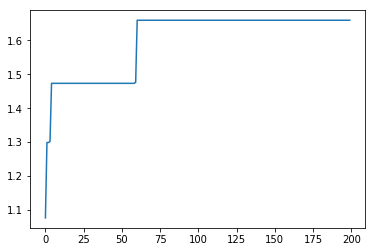

In [82]:
solution, latency = bees.search(objective, particle_placement_loss, T)
solution_x, solution_y = solution
print(solution)
print(latency)
bees.plot_history()

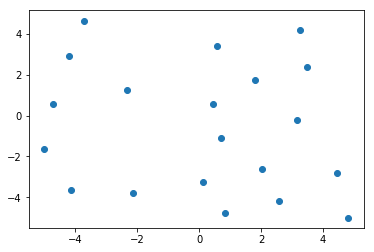

In [83]:
solution_positions = np.array(np.split(solution_x, k))
plt.scatter(solution_positions.T[0], solution_positions.T[1])
plt.show()